<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/5_An%C3%A1lisis%20de%20redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Laplace

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Análisis de Redes con Elementos Pasivos

Es bien sabido que la transformada de Laplace es una herramienta para resolver ecuaciones diferencial tomando en cuenta los valores iniciales. Las [redes electricas](https://en.wikipedia.org/wiki/Electrical_network) compuestas por elementos pasivos lineales, como resistores, capacitores e inductores pueden ser descritas matemáticamente por ecuaciones diferenciales ordinarias lineales (ODEs) con coeficientes constantes. La transformada de Laplace permite el análisis de dichas redes. 

### Impedancias Complejas y Redes Equivalentes

El concepto de impedancias complejas es utilizado para analizar redes eléctricas pasivas en el dominio de Laplace. Primero se observarán las ecuaciones diferenciales que describen la relación entre el voltaje $u(t)$ y la corriente $i(t)$ para elementos lineales pasivos. Son resumidas en la segunda columna de la siguiente tabla:

| Elemento | $\quad \qquad \qquad \quad \quad$ Dominio del Tiempo $\qquad \qquad \qquad \quad \quad$ | $\qquad \qquad$ Dominio de Laplace $ \qquad \quad$ | Impedancia $Z(s)$ |
|:---:|:---:|:---:|:---:|
| ![Resistor](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/resistor.png?raw=1) | $u(t) = R \cdot i(t)$ | $U(s) = R \cdot I(s)$ | $R$ |
| ![Inductor](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/inductor.png?raw=1) | $\begin{matrix} u(t) = L \frac{d}{dt} i(t) \\ i(t) = \frac{1}{L} \int_{0}^{t} u(\tau) d\tau + i(0+) \epsilon(t) \end{matrix}$ | $\begin{matrix} U(s) = s L I(s) - L i(0+) \\ I(s) = \frac{1}{s L} U(s) + \frac{1}{s} i(0+) \end{matrix}$ | $s L$ |
| ![Capacitor](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/capacitor.png?raw=1) | $\begin{matrix} u(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau + u(0+) \epsilon(t) \\ i(t) = C \frac{d}{dt} u(t) \end{matrix}$ | $\begin{matrix} U(s) = \frac{1}{s C} I(s) + \frac{1}{s} u(0+) \\ I(s) = s C U(s) - C u(0+) \end{matrix}$ | $\frac{1}{s C}$

Se asume que el voltaje $u(t)=0$ y la corriente $i(t)=0$ para $t<0$, por lo tanto son señales causales. Los valores inciales $u(0+)$ e $i(0+)$ indican los valores iniciales para $t=0$ por la derecha: $u(0+) = \lim_{\epsilon \to 0} u(0 + \epsilon)$. Los valores iniciales representan la energía almacenada en los capacitores y los inductores en el instante $t=0$ respectivamente. El análisis de una red eléctrica pasiva se realiza mediante las [leyes de Kirchhoff](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws) dando como resultado una ODE, describiendo la relación entre los voltajes de entrada y salida. Ver ejemplo de [análisis de redes anterior](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/5_An%C3%A1lisis%20de%20redes.ipynb).

Las relaciones en el dominio del tiempo pueden ser transformadas al dominio de Laplace, aplicando los [teoremas de derivación e integración](table_theorems_transforms.ipynb#Properties-and-Theorems) de la transformada de Laplace.Los resultados son resumidos en la tercera columna. La derivación e integración se representan por operaciones algebráicas. Las leyes de Kirchhoff se pueden aplicar directamente a las cantidades transformadas usando las relaciones transformadas. Esto es debido al hecho de que la transformada de Laplace es una operación lineal. El resultado es una ecuación algebráica que puede ser resuelta directamente con respecto a las variables deseadas.

Cuando los valores iniciales $u(0+)$ o $i(0+)$ son cero, los elementos pueden ser caracterizados en el dominio de Laplace por sus [impedancias complejas](https://en.wikipedia.org/wiki/Electrical_impedance). La impedancia compleja $Z(s)$ se define a continuación:

\begin{equation}
Z(s) = \frac{U(s)}{I(s)}
\end{equation}

Las impedancias complejas pueden ser usadas para representar una red eléctrica pasiva en el dominio de Laplace. El análisis de una red eléctrica en el dominio de Laplace se ilustra en el ejemplo de la siguiente sección. Observe que consideraciones similares aplican para sistemas mecánicos y otros problemas descritos por ODEs.

### Ejemplo: Filtro Pasa Bajo de Segundo Orden

El filtro de segundo orden es analizado empleando la transformada de Laplace. Primero, la respuesta al escalón con valores iniciales iguales a cero es calculada y posteriormente se analiza incluyendo valores inciales.

#### Señal de Salida para valores iniciales iguales a cero

Se asume que no hay energía almacenada en el capacitor ni en el inductor para $t<0$. En consecuencia, los valores iniciales se pueden descartar. La red equivalente en el dominio de Laplace se deriva al transformar la entrada $x(t)$ y la salida $y(t)$, e introducir las impedancias complejas de la anterior tabla de elementos.

![Red equivalente en el dominio de Laplace](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/lowpass_laplace_domain.png?raw=1)

Aplicando las  [leyes de Kirchhoff](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws) con impedancias complejas de los elementos de la red, se tiene la salida $Y(s)$ relacionada con la entrada $X(s)$ en el dominio de Laplace:

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot X(s)
\end{equation}

Esta relación se define con `SymPy` para su posterior evaluación

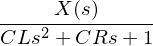

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(L*C*s**2 + R*C*s + 1) * X
Y

La respuesta $y(t)$ de la red ante una entrada [Heaviside](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_Sistemas_Tiempo/3.Respuesta_Escalon.ipynb) , es calculada al hacer que $x(t) = \epsilon(t)$. La transformada de Laplace $Y(s)$ de la señal de salida está dada por

\begin{equation}
Y(s) = \frac{1}{LC s^2 + RC s + 1} \cdot \frac{1}{s}
\end{equation}

La señal de salida $y(t)$ es calculada mediante la transformada inversa de Laplace de $Y(s)$ para los siguientes valores:  $L = 0.5$, $R = 1$, $C = 0.4$.

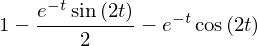

In [ ]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)
y

El resultado se simplifica para facilitar la visualización.

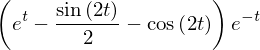

In [ ]:
y = y.simplify()
y

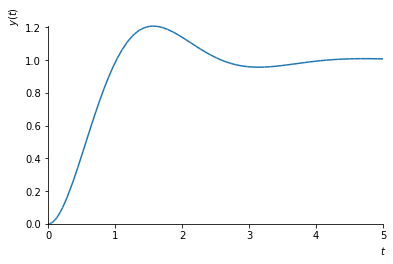

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

El cálculo de la señal de salida $y(t)$ no requiere de la solución de la ODE. Con base en la red equivalente en el dominio de Laplace, solo se requiere del cálculo de la transformada inversa de Laplace.

#### Señal de Salida Incluyendo Valores Iniciales

Ahora se realiza el análisis con valores iniciales diferentes de cero. Como valores iniciales se asume que, el voltaje $u_\text{C}(0+) = -1$ en el capacitor y la corriente $i_\text{L}(0+) = 0$ en el inductor. La red es analizada nuevamente con las leyes de Kirchhoff, pero ahora no se descartan los valores iniciales. Usando la representación en el dominio de Laplace de los elementos de la red de la tabla anterior, resulta en

\begin{align}
Y(s) &= \underbrace{\frac{1}{L C s^2 + R C s + 1} \cdot X(s)}_{Y_\text{ext}(s)} \\
&+ \underbrace{\frac{R C + L C s}{L C s^2 + R C s + 1} \cdot y(0+) + \frac{L}{L C s^2 + R C s + 1} \cdot i_\text{L}(0+)}_{Y_\text{int}(s)}
\end{align}

Donde el voltaje $u_\text{C}(0+)$ en el capcitor es igual al valor inicial de la salida $y(0+)$. el índice para la corriente $i_\text{L}(t)$ en el inductor se descarta por simplicidad. Los términos han sido ordenados con respecto a la dependencia con la entrada $X(s)$ y los valores iniciales $y(0+)$ y $i(0+)$. La parte de la salida que depende solo de la entrada se denomina parte *externa* $Y_\text{ext}(s)$. La parte de la señal de salida que depende solo de los valores iniciales se denomina parte *interna* $Y_\text{int}(s)$. La señal de salida está dada por la superposición de ambas partes

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

Donde $y_\text{ext}(t) = \mathcal{L}^{-1} \{ Y_\text{ext}(s) \}$ y $y_\text{int}(t) = \mathcal{L}^{-1} \{ Y_\text{int}(s) \}$.

La parte externa se calculó anteriormente.

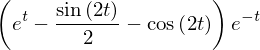

In [ ]:
yext = y
yext.simplify()

La transformada de Laplace de la parte interna $Y_\text{int}(s)$ se define así

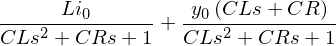

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

La transformada inversa de Laplace se calcula para valores inciales $y(0+)$ e $i(0+)$, y los valores de $R$, $L$ and $C$ dados anteriormente

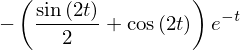

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t)
yint

La señal de salida $y(t)$ está dada por la superposición de ambas partes

In [ ]:
y = yext + yint
y.simplify()

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja) 

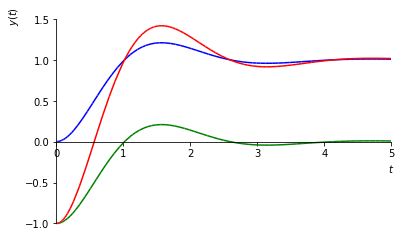

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.